In [1]:
import pandas as pd
import numpy as np
from colossus.cosmology import cosmology as cocosmology
from colossus.lss import mass_function
import matplotlib.pyplot as plt
%matplotlib inline



M_arr = np.logspace(13.9,16,256)
M_arr_bins = np.logspace(13.9,16,257)
z_arr = np.linspace(.1,2,128)

def _read_dataframe(fname='20220413_MF.csv'):
    dataframe = pd.read_csv(fname)
    assert 'redshift' in dataframe.columns and 'Mvir' in dataframe.columns
    if 'split' not in dataframe:
        pass
        #dataframe = dataframe.iloc[np.random.RandomState(7).choice(dataframe.index, int(0.2 * len(dataframe)), replace=False)]
    else:
        dataframe = dataframe[dataframe['split'] == 'test']
    return dataframe.reset_index().reindex(columns=['redshift', 'Mvir'])
df = _read_dataframe('/srv/scratch1/zhenlin4/deepszUQ/Temp/20220910_filter_z0.1_m1e14.csv')
df

,redshift,Mvir
0,0.1005,1.724286e+14
1,0.1007,1.246599e+14
2,0.1005,1.169708e+14
3,0.1005,3.611967e+14
4,0.1009,5.762038e+14
...,...,...
83823,2.5952,1.028421e+14
83824,2.6017,1.029382e+14
83825,2.5939,1.179320e+14
83826,2.6291,1.113962e+14


# Incorrect params (from posterior)

In [2]:

cosmology = {
                 #'Omega_m': 0.264,
    'Omega_m': 0.33,
                 'Omega_b': 0.044, #block.get_double('cosmological_parameters', 'Omega_b'),
                 'w0': -1.0,
                 'wa': 0.0,
                 'h': 0.71,
                 #'sigma8': 0.80,
    'sigma8': 0.88,
                 'ns': 0.96,
                 'mass_bias': 1.0,
                 'Tcmb0' : 2.726,
    }
cosmology['Omega_l'] = cosmology['Omega_m']
co_params = {'flat': True}
for me,co in zip(['h', 'Omega_m', 'Omega_b', 'sigma8', 'ns', 'Tcmb0'],
                     ['H0', 'Om0', 'Ob0', 'sigma8', 'ns', 'Tcmb0']):
    co_params[co] = cosmology[me]
co_params['H0']*= 100

_ = cocosmology.setCosmology('', co_params)

bad_massfunc = np.array([mass_function.massFunction(M_arr, z, mdef='vir', model='despali16', q_in='M', q_out='dndlnM') for z in z_arr])
cosmo = cocosmology.getCurrent()
#https://lambda.gsfc.nasa.gov/simulation/full_sky_sims_readme_sz.html has the true params
cosmo.__dict__

{'name': '',
 'flat': True,
 'Om0': 0.33,
 'Ode0': 0.6699169484203213,
 'Ob0': 0.044,
 'H0': 71.0,
 'sigma8': 0.88,
 'ns': 0.96,
 'de_model': 'lambda',
 'w0': -1,
 'wa': None,
 'wz_function': None,
 'relspecies': True,
 'Tcmb0': 2.726,
 'Neff': 3.046,
 'power_law': False,
 'power_law_n': 0.0,
 'h': 0.71,
 'h2': 0.5041,
 'Omh2': 0.166353,
 'Ombh2': 0.0221804,
 'Ogamma0': 4.9091563386407975e-05,
 'Onu0': 3.39600162921684e-05,
 'Or0': 8.305157967857638e-05,
 'a_eq': 0.00025167145357144356,
 'Ok0': 0.0,
 'interpolation': True,
 'print_info': False,
 'print_warnings': True,
 'storageUser': <colossus.utils.storage.StorageUser at 0x7fcaf863e730>,
 'z_min': -0.995,
 'z_min_compute': -0.998,
 'z_max': 200.01,
 'z_max_compute': 500.0,
 'z_Nbins': 50,
 'k_Pk': [1e-20, 0.0001, 0.05, 1.0, 1000000.0, 1e+20],
 'k_Pk_Nbins': [10, 30, 60, 20, 10],
 'k_Pk_Nbins_equal': 800,
 'R_min_sigma': 1e-12,
 'R_max_sigma': 1000.0,
 'R_Nbins_sigma': 18.0,
 'R_Nbins_sigma_klimits': 60.0,
 'accuracy_sigma': 0.003,
 '

In [3]:
cosmology = {
                 'Omega_m': 0.264,
                 'Omega_b': 0.044, #block.get_double('cosmological_parameters', 'Omega_b'),
                 'w0': -1.0,
                 'wa': 0.0,
                 'h': 0.71,
                 'sigma8': 0.80,
                 'ns': 0.96,
                 'mass_bias': 1.0,
                 'Tcmb0' : 2.726,
    }
cosmology['Omega_l'] = cosmology['Omega_m']
co_params = {'flat': True}
for me,co in zip(['h', 'Omega_m', 'Omega_b', 'sigma8', 'ns', 'Tcmb0'],
                     ['H0', 'Om0', 'Ob0', 'sigma8', 'ns', 'Tcmb0']):
    co_params[co] = cosmology[me]
co_params['H0']*= 100

_ = cocosmology.setCosmology('', co_params)
massfunc = np.array([mass_function.massFunction(M_arr, z, mdef='vir', model='despali16', q_in='M', q_out='dndlnM') for z in z_arr])
cosmo = cocosmology.getCurrent()
#https://lambda.gsfc.nasa.gov/simulation/full_sky_sims_readme_sz.html has the true params
cosmo.__dict__

Deleted outdated persistence file, no further action needed.


{'name': '',
 'flat': True,
 'Om0': 0.264,
 'Ode0': 0.7359169484203214,
 'Ob0': 0.044,
 'H0': 71.0,
 'sigma8': 0.8,
 'ns': 0.96,
 'de_model': 'lambda',
 'w0': -1,
 'wa': None,
 'wz_function': None,
 'relspecies': True,
 'Tcmb0': 2.726,
 'Neff': 3.046,
 'power_law': False,
 'power_law_n': 0.0,
 'h': 0.71,
 'h2': 0.5041,
 'Omh2': 0.13308240000000002,
 'Ombh2': 0.0221804,
 'Ogamma0': 4.9091563386407975e-05,
 'Onu0': 3.39600162921684e-05,
 'Or0': 8.305157967857638e-05,
 'a_eq': 0.00031458931696430446,
 'Ok0': 0.0,
 'interpolation': True,
 'print_info': False,
 'print_warnings': True,
 'storageUser': <colossus.utils.storage.StorageUser at 0x7fcaf868ef10>,
 'z_min': -0.995,
 'z_min_compute': -0.998,
 'z_max': 200.01,
 'z_max_compute': 500.0,
 'z_Nbins': 50,
 'k_Pk': [1e-20, 0.0001, 0.05, 1.0, 1000000.0, 1e+20],
 'k_Pk_Nbins': [10, 30, 60, 20, 10],
 'k_Pk_Nbins_equal': 800,
 'R_min_sigma': 1e-12,
 'R_max_sigma': 1000.0,
 'R_Nbins_sigma': 18.0,
 'R_Nbins_sigma_klimits': 60.0,
 'accuracy_sigma'

In [4]:

z_locs = [10, 30, 50, 70]

def _mse(f1, scale_1, f2, scale_2):
    return np.sqrt(np.mean(np.power(f1/scale_1 - f2/scale_2, 2)))
def plot_massfunc_by_redshift(z_loc, ax, correct_massfunc, other_mass_funcs = {}, align_others=False):
    colors = ['green', 'purple', '']
    z_min, z_max = z_arr[z_loc - 1], z_arr[z_loc + 1]

    tdf = df[(df['redshift'] >= z_min) & (df['redshift'] <= z_max)]
    hist = ax.hist(tdf['Mvir'], bins=M_arr_bins, weights=1./len(tdf) * np.ones(len(tdf)), label='empirical dist. (left axis)')[0]
    
    # find the mass cut
    first_bin = 0
    while hist[first_bin+1] == 0: first_bin += 1
    scale_1 = correct_massfunc[z_loc][first_bin:].sum()
    scale_2 = hist[first_bin:].sum()

    ylim1 = ax.get_ylim()
    ax2 = ax.twinx()
    rmse = _mse(correct_massfunc[z_loc][first_bin:], scale_1, hist[first_bin:], scale_2)
    ax2.plot(M_arr, correct_massfunc[z_loc], color='red', alpha=0.5, label=f'correct mass_func (RMSE={rmse:.5f})')
    ax2.set_xscale('log')
    ax2.set_ylim(0, ylim1[1] * scale_1 / scale_2)
    for i ,(label, mass_func) in enumerate(other_mass_funcs.items()):
        
        if align_others:
            scale = scale_1 / mass_func[z_loc][first_bin:].sum()
        else:
            scale = 1
        rmse = _mse(mass_func[z_loc][first_bin:], mass_func[z_loc][first_bin:].sum(), hist[first_bin:], scale_2)
        ax2.plot(M_arr, mass_func[z_loc] * scale, color=colors[i], alpha=0.5, label=label+f" (RMSE={rmse:.5f})")
    ax.legend(loc='center right')
    ax2.legend()
    ax2.set_title(f"{len(tdf)} clusters with z in [{z_min:.3f}, {z_max:.3f}]")

Text(0.5, 0, 'model=despali16')

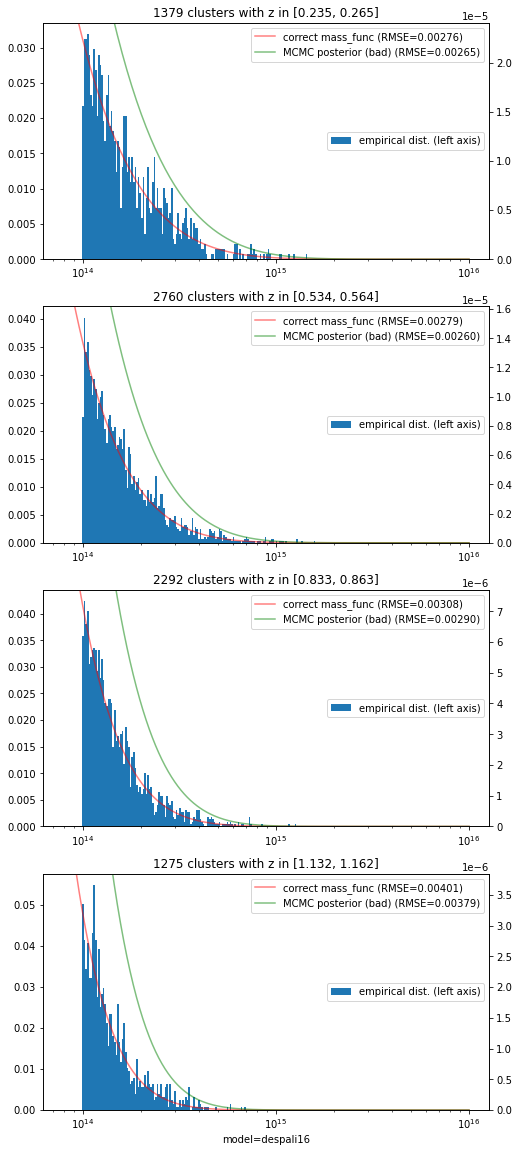

In [5]:

fig, axes = plt.subplots(nrows=len(z_locs), figsize=(8, 5 * len(z_locs)))


for i, z_loc in enumerate(z_locs):
    plot_massfunc_by_redshift(z_loc, axes[i], massfunc, other_mass_funcs={"MCMC posterior (bad)": bad_massfunc})
axes[-1].set_xlabel('model=despali16')

Text(0.5, 0, 'model=despali16')

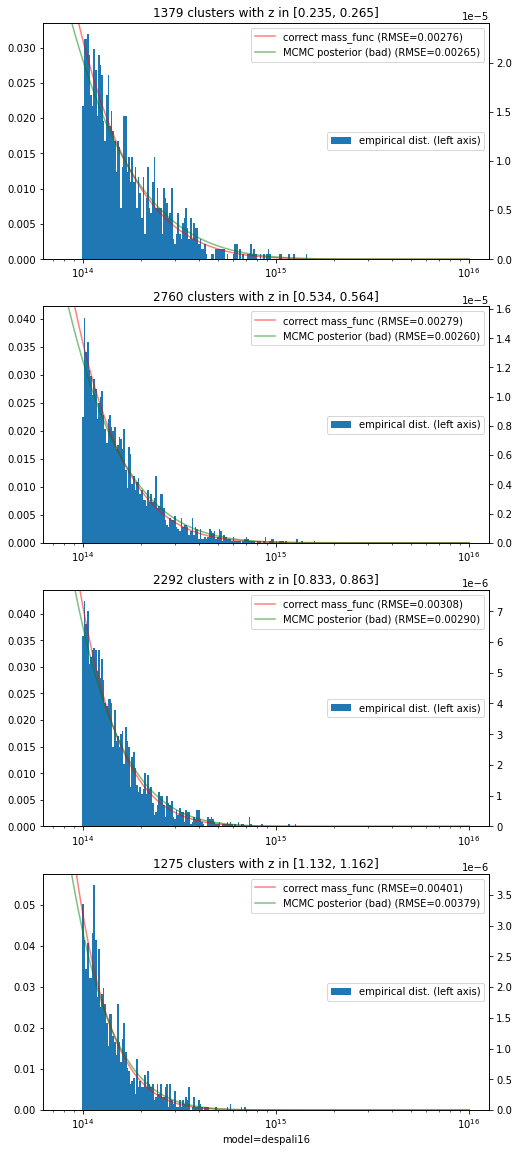

In [6]:

fig, axes = plt.subplots(nrows=len(z_locs), figsize=(8, 5 * len(z_locs)))


for i, z_loc in enumerate(z_locs):
    plot_massfunc_by_redshift(z_loc, axes[i], massfunc, other_mass_funcs={"MCMC posterior (bad)": bad_massfunc}, align_others=True)
axes[-1].set_xlabel('model=despali16')